In [1]:
#尝试研究B达成的规律性


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 读取 CSV 文件并创建 DataFrame
accept_pv_df = pd.read_csv('accept_pv.csv', header=0)


# 打印 DataFrame 的第一行
first_row = accept_pv_df.head(n=1)
print(first_row)

         ds        uid  pv
0  2023/7/6  100000044   1


In [3]:

#dataframe行转列
# 使用pivot函数进行行转列，并按照ds的顺序给出pv
accept_pv_df_pivot = accept_pv_df.pivot(index='uid', columns='ds', values='pv').reset_index()

# 将 DataFrame 中的 NaN 值替换为 0
accept_pv_df_pivot_filled = accept_pv_df_pivot.fillna(0)

# 打印 DataFrame 的第一行
first_row_1 = accept_pv_df_pivot_filled.head(n=1)
print(first_row_1)


ds      uid  2022/10/1  2022/10/10  2022/10/11  2022/10/12  2022/10/13  \
0   1000108        0.0         0.0         0.0         0.0         0.0   

ds  2022/10/14  2022/10/15  2022/10/16  2022/10/17  ...  2023/8/3  2023/8/30  \
0          0.0         0.0         0.0         0.0  ...       0.0        0.0   

ds  2023/8/31  2023/8/4  2023/8/5  2023/8/6  2023/8/7  2023/8/8  2023/8/9  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   

ds  2023/9/1  
0        0.0  

[1 rows x 367 columns]


In [7]:
# 去掉uid
df_cluster_pre = accept_pv_df_pivot_filled.drop('uid',axis=1)

# 使用K均值聚类算法，将用户行为划分为3个模式
k = 3
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict( df_cluster_pre ) #

#把结果合并为一个df
df_clustered = df_cluster_pre
df_clustered['Cluster'] = labels

# 打印 DataFrame 的第一行
first_row_2 = df_clustered.head(n=1)
print(first_row_2)


ds  2022/10/1  2022/10/10  2022/10/11  2022/10/12  2022/10/13  2022/10/14  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

ds  2022/10/15  2022/10/16  2022/10/17  2022/10/18  ...  2023/8/30  2023/8/31  \
0          0.0         0.0         0.0         0.0  ...        0.0        0.0   

ds  2023/8/4  2023/8/5  2023/8/6  2023/8/7  2023/8/8  2023/8/9  2023/9/1  \
0        0.0       0.0       0.0       0.0       0.0       0.0       0.0   

ds  Cluster  
0         0  

[1 rows x 367 columns]


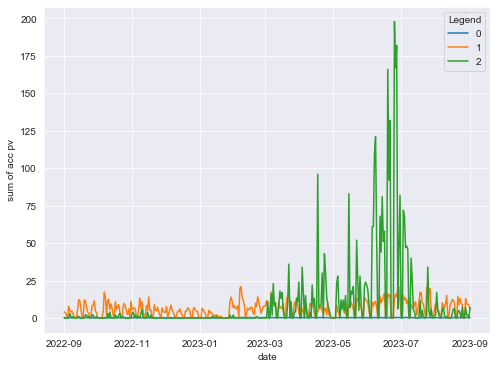

In [40]:
df_sum = df_clustered.groupby(['Cluster']).mean()

df_plot = df_sum.T
df_plot.index = pd.to_datetime(df_plot.index)
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values('ds')
df_plot.columns = df_plot.columns.astype(str)

#
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.plot(df_plot['ds'],df_plot['0'],label="0")
plt.plot(df_plot['ds'],df_plot['1'],label="1")
plt.plot(df_plot['ds'],df_plot['2'],label="2")
plt.xlabel('date')
plt.ylabel('sum of acc pv')
plt.legend(title='Legend', loc='upper right')
plt.show()